In [25]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

In [12]:
# input image dimensions
img_rows, img_cols = 28, 28

In [6]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [7]:
def return_many_things():
    return 1, "this", ["things"]

my_number, my_string, my_array = return_many_things()

In [8]:
my_number

1

In [9]:
my_string

'this'

In [10]:
my_array

['things']

In [13]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # 28x28x1
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
import numpy as np

In [17]:
thing = np.array([1,2,3])

In [18]:
thing

array([1, 2, 3])

In [19]:
thing * 2

array([2, 4, 6])

In [21]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
[1, 7, 2, 4]

[[0,1,0,0,0,0,0],
[0,0,0,0,0,1,0]



[0,0,0,0,1,0,0,0,0,0]

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1886 - accuracy: 0.9423 - val_loss: 0.0859 - val_accuracy: 0.9717
Epoch 2/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.0438 - val_accuracy: 0.9854
Epoch 3/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0301 - accuracy: 0.9909 - val_loss: 0.0361 - val_accuracy: 0.9888
Epoch 4/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0342 - val_accuracy: 0.9878
Epoch 5/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 6/12
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.0320 - val_accuracy: 0.9892
Epoch 7/12
60000/60000 [==============================] - 83s 1ms/st

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04452279717815632
Test accuracy: 0.9898999929428101


In [27]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [31]:
%matplotlib inline

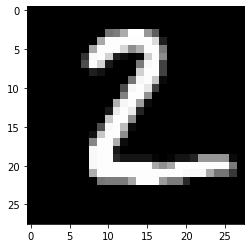

In [35]:
import matplotlib.pyplot as plt
import numpy as np

#X = np.random.random((100, 100)) # sample 2D array
X = x_test[1].reshape(28,28)
plt.imshow(X, cmap="gray")
plt.show()

In [43]:
# y = np.expand_dims(x, axis=0)
# predict(x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)
#model.predict(x_test[1])
model.predict(np.expand_dims(x_test[1], axis=0))

array([[5.6524924e-17, 1.2006926e-13, 1.0000000e+00, 1.0513724e-19,
        7.0421994e-28, 3.3478464e-29, 6.0962909e-18, 1.8619276e-23,
        4.3416704e-20, 2.1905563e-25]], dtype=float32)

In [45]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [44]:
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

In [46]:
y_test2[1]

2